$$\lambda_p=S+A_1p+A_2p^2+A_3p^3$$

In [335]:
import math
import numpy as np
from lmfit import models
from scipy.optimize import fsolve
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [336]:
lamda_p=[585.25, 609.62, 639.23, 650.23]
lamda_p = np.array(lamda_p)
lamda_p_error=[0.1,2,3,1]
lamda_p_error = np.array(lamda_p_error)
lamda_p_weight = 1/(np.array(lamda_p_error))
p=[1768.370887,2217.282097,2776.418613,2986.168976]
p=np.array(p)
p_error=[56.09028419699995, 20.79817753199994, 26.778450233999898, 18.047039645999696]
p_error = np.array(p_error)
p_weight =1/(np.array(p_error))

nu de error lijsten

In [337]:
lamda_bovenste_error=lamda_p+lamda_p_error
lamda_onderste_error=lamda_p-lamda_p_error

In [338]:
df = pd.DataFrame({'lamda_p': lamda_p,
                    'lamda_weight':lamda_p_weight,
                    'p':p,
                    'p_weight':p_weight,
                    'lamda_boven_lijst':lamda_bovenste_error,
                    'lamda_onder_lijst':lamda_onderste_error})
df

,lamda_p,lamda_weight,p,p_weight,lamda_boven_lijst,lamda_onder_lijst
0,585.25,10.000000,1768.370887,0.017828,585.35,585.15
1,609.62,0.500000,2217.282097,0.048081,611.62,607.62
2,639.23,0.333333,2776.418613,0.037343,642.23,636.23
3,650.23,1.000000,2986.168976,0.055411,651.23,649.23


Text(0, 0.5, 'golflengte (nm)')

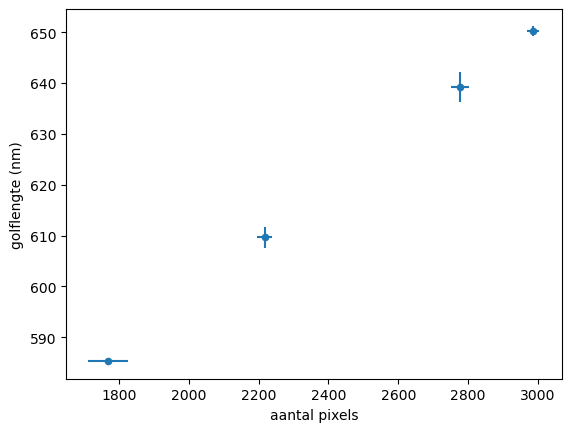

In [339]:
ax = df.plot.scatter('p','lamda_p',xerr=p_error,yerr=lamda_p_error)

# Set axis labels
ax.set_xlabel('aantal pixels')
ax.set_ylabel('golflengte (nm)')

# Set axis view limits
# ax.set_xlim(1500, 3000)
# ax.set_ylim(0, 700)

In [340]:
def formule(p,S,A_1,A_2,A_3):
    return A_1 *p + A_2*p**2 +A_3*p**3 +S 
curve_model= models.Model(formule)


In [341]:
fit_result=curve_model.fit(df['lamda_p'],p=df['p'],weights=df['lamda_weight'],S=500,A_1=0.4,A_2=0.0001,A_3=0.000000001)

In [342]:
fit_result

Text(0.5, 1.0, '')

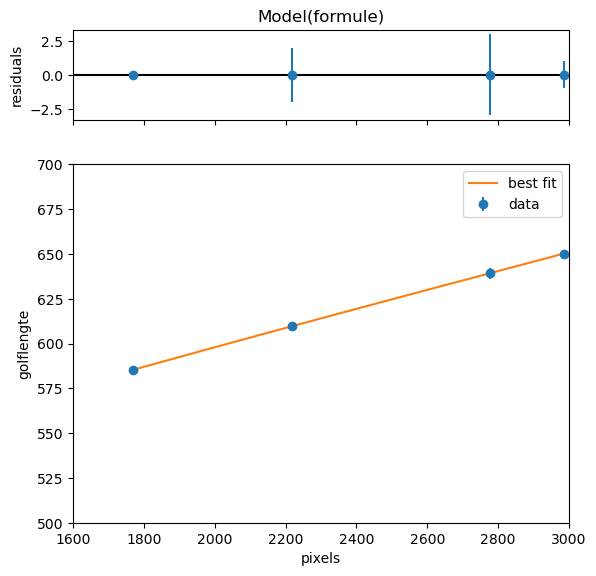

In [343]:
# plot fit including residuals
fit_result.plot(numpoints=1000)

# Set axis labels
plt.xlabel('pixels')
plt.ylabel('golflengte')

# Set axis view limits
plt.xlim(1600, 3000)
plt.ylim(500, 700)

# Remove title
plt.title(None)


errors op $S, A_1, A_2$ en $A_3$ bepalen.

In [375]:
params_hoog=Parameters()

NameError: name 'Parameters' is not defined

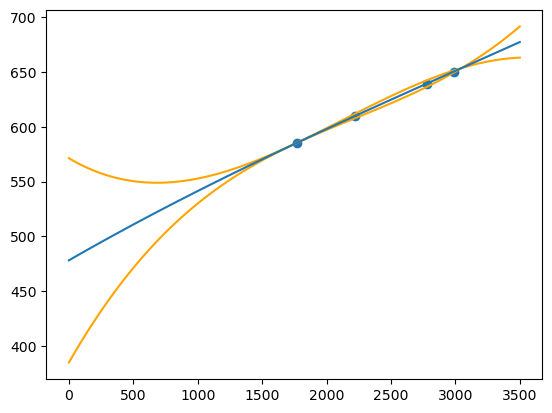

In [369]:
fit_result_hoog=curve_model.fit(df['lamda_boven_lijst'],p=df['p'],weights=df['p_weight'],S=500,A_1=0.4,A_2=0.0001,A_3=0.000000001)
fit_result_laag=curve_model.fit(df['lamda_onder_lijst'],p=df['p'],weights=df['p_weight'],S=500,A_1=0.4,A_2=0.0001,A_3=0.000000001)
S_error = fit_result_hoog.params['S'].value-fit_result_laag.params['S'].value
# (fit_result_laag.params['S'].value+fit_result_hoog.params['S'].value)/2
# fit_result_laag.params['S'].value
x_as=np.linspace(0,3500,100)
lamda_laag=[formule(i,fit_result_laag.params['S'],fit_result_laag.params['A_1'],fit_result_laag.params['A_2'],fit_result_laag.params['A_3']) for i in x_as]
lamda_hoog=[formule(i,fit_result_hoog.params['S'],fit_result_hoog.params['A_1'],fit_result_hoog.params['A_2'],fit_result_hoog.params['A_3']) for i in x_as]
lamda=[formule(i,fit_result.params['S'],fit_result.params['A_1'],fit_result.params['A_2'],fit_result.params['A_3']) for i in x_as]

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(x_as,lamda_hoog,color='orange')
ax1.plot(x_as,lamda_laag,color='orange')
ax1.plot(x_as,lamda)
ax1.plot
ax1.scatter(p,lamda_p)
plt.show()

in de stuk hieronder wordt de error op de golflengte bepaald voor een specefieke pixelwaarde met pixel-error.


In [373]:
def formule_lamda_laag(p):
    return formule(p,fit_result_laag.params['S'],fit_result_laag.params['A_1'],fit_result_laag.params['A_2'],fit_result_laag.params['A_3'])
def formule_lamda_hoog(p):
    return formule(p,fit_result_hoog.params['S'],fit_result_hoog.params['A_1'],fit_result_hoog.params['A_2'],fit_result_hoog.params['A_3'])
def lamda_error(p, delta_p):
    p_laag=p-delta_p
    p_hoog=p+delta_p
    lamda_lijstje=[]
    
    lamda_laag_err= formule_lamda_laag(p_laag)
    lamda_hoog_err=formule_lamda_hoog(p_hoog)
    lamda_err_berekening=lamda_hoog_err-lamda_laag_err
    return lamda_err_berekening
print(lamda_error(2500,15))

8.128267274452128


Text(0.5, 1.0, '')

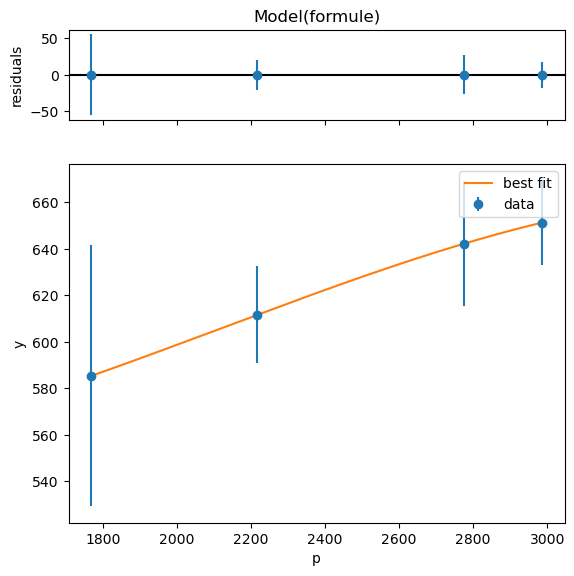

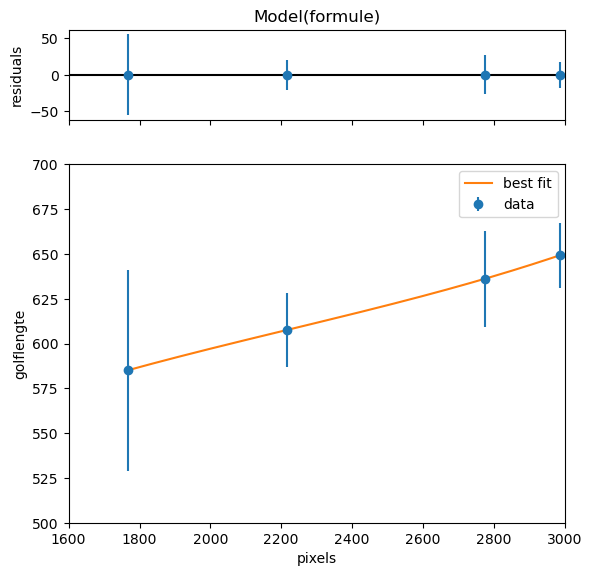

In [345]:
# plot fit including residuals
fit_result_hoog.plot(numpoints=1000)
fit_result_laag.plot(numpoints=1000)

# Set axis labels
plt.xlabel('pixels')
plt.ylabel('golflengte')

# Set axis view limits
plt.xlim(1600, 3000)
plt.ylim(500, 700)

# Remove title
plt.title(None)


$$\lambda_p=S+A_1p+A_2p^2+A_3p^3$$
$$\frac{\partial\lambda_p}{\partial p}=A_1+2A_2p^2+3A_3p^3$$
$$\Delta \lambda_p=\sqrt{((A_1+2A_2p^2+3A_3p^3)\Delta p)^2}$$